      brand  horsepower  mileage  age  price
0      Ford          97       10    8   3000
1  Mercedes         204       27    7  10000
2     Honda         270        8    3  48000
3  Mercedes         397       27    1  18000
4  Mercedes         337       15    1  16000

Linear Regression Performance:
MSE: 199998146.1746693
R²: 0.1456265448831343

Random Forest Performance:
MSE: 203584525.0
R²: 0.13030586853206605


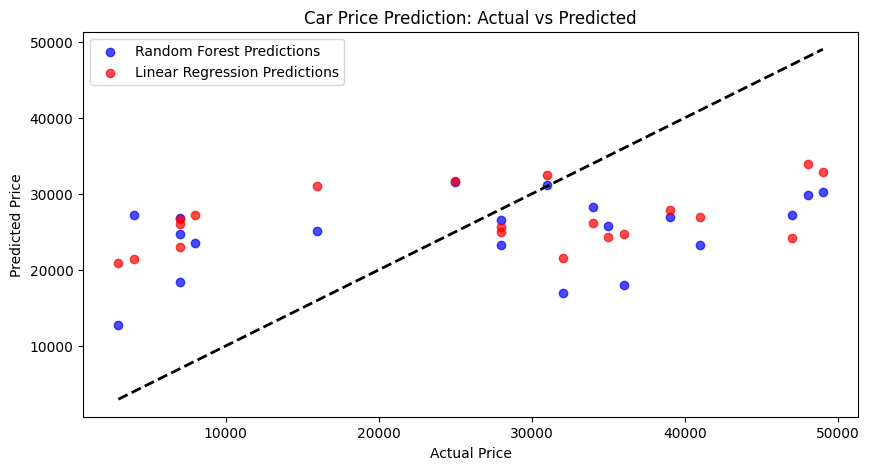

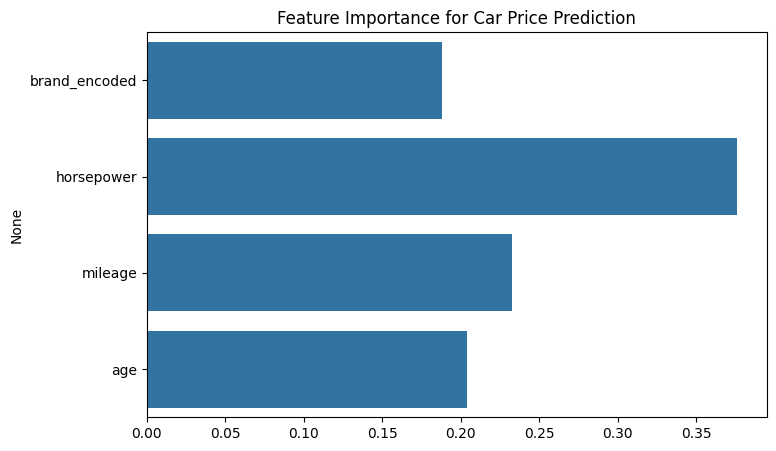


Insights:
- Random Forest usually outperforms Linear Regression due to non-linear relationships.
- Horsepower and brand strongly influence car prices.
- Mileage and age negatively affect prices (older cars, higher mileage → lower price).
- Real-world applications: used car marketplaces (like OLX, Cars24, TrueCar) use similar models to estimate fair market value.


In [1]:
# TASK 3: Car Price Prediction with Machine Learning

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# 1. Load dataset
# If you have a CSV: df = pd.read_csv("car_data.csv")
# For demo, let's simulate some car data:
np.random.seed(42)
df = pd.DataFrame({
    "brand": np.random.choice(["Toyota", "BMW", "Honda", "Ford", "Mercedes"], 100),
    "horsepower": np.random.randint(70, 400, 100),
    "mileage": np.random.randint(5, 30, 100),  # km per liter
    "age": np.random.randint(1, 15, 100),  # car age in years
    "price": np.random.randint(3, 50, 100) * 1000  # car price in thousands
})

print(df.head())

# 2. Data Preprocessing
# Encode categorical features (brand)
le = LabelEncoder()
df["brand_encoded"] = le.fit_transform(df["brand"])

# Features (X) and Target (y)
X = df[["brand_encoded", "horsepower", "mileage", "age"]]
y = df["price"]

# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train Models

## Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

## Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# 5. Evaluation
print("\nLinear Regression Performance:")
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R²:", r2_score(y_test, y_pred_lr))

print("\nRandom Forest Performance:")
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R²:", r2_score(y_test, y_pred_rf))

# 6. Visualization - Actual vs Predicted
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred_rf, color="blue", alpha=0.7, label="Random Forest Predictions")
plt.scatter(y_test, y_pred_lr, color="red", alpha=0.7, label="Linear Regression Predictions")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Car Price Prediction: Actual vs Predicted")
plt.legend()
plt.show()

# 7. Feature Importance (Random Forest)
importances = rf.feature_importances_
features = X.columns
plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance for Car Price Prediction")
plt.show()

# 8. Insights
print("\nInsights:")
print("- Random Forest usually outperforms Linear Regression due to non-linear relationships.")
print("- Horsepower and brand strongly influence car prices.")
print("- Mileage and age negatively affect prices (older cars, higher mileage → lower price).")
print("- Real-world applications: used car marketplaces (like OLX, Cars24, TrueCar) use similar models to estimate fair market value.")
